### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



In [25]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
path="C:/Users/Boom/Documents/Data projects"
os.chdir(path)

In [3]:
df = pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

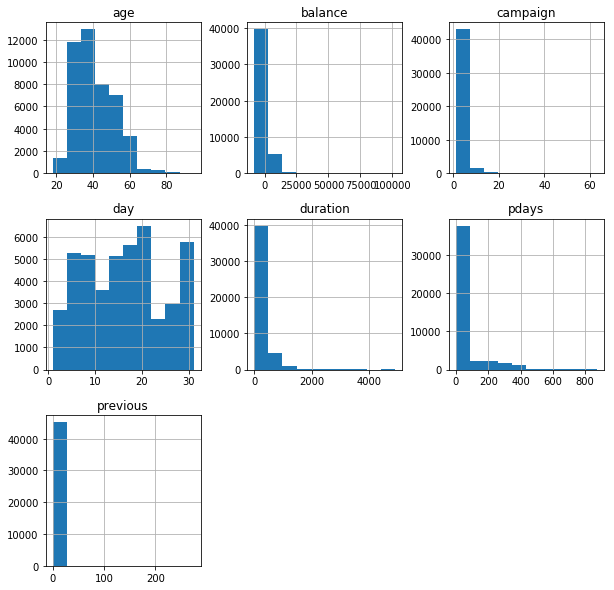

In [5]:
df.hist(figsize = (10, 10))
plt.show()

In [6]:
categ_vars = ['job','marital','education','default','housing','loan','contact',
             'month','poutcome']
#create dummy variables for the categorical variables in df , drop_first=True drops first dummy 
#and sets it as base group
df = pd.get_dummies(df, columns=categ_vars,drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
df.columns.get_loc("y")

7

In [27]:
#change yes/no to 0/1
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [28]:
Y=df["y"]
X = df.drop('y', 1)

In [29]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred = model.predict(X_test)

In [34]:
print("Model Accuracy:",model.score(X_test,Y_test))

Model Accuracy: 0.9022448302554462


In [35]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, probs)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc: ",roc_auc)

roc_auc:  0.9048614899678731
